### Introduction ###
Sleeping patterns are critical to daily performance and personal well-being. Neglecting sleep can have drastic consequences, and there are various aspects of one’s lifestyle that can be affected by the quality and quantity of sleep one receives. For post-secondary students, prioritizing sleep by enhancing quality, duration, and consistency has been linked to improved academic performance (Okano et al, 20XX). Further, sleep loss and disorders have been linked to an increased risk of hypertension, diabetes, obesity, depression, heart attack, and stroke (Source 10). For this reason, the motivation behind this report is to analyze how exogenous factors may predict sleep efficiency since sleep seems to have a significant impact on academic performance and health, which is of interest to post-secondary students. Thus, the selected Sleep Efficiency Dataset (Source) will facilitate this analysis. In doing this analysis, variables that may be affected by the response variable are not to be selected as explanatory variables to avoid the issue of endogeneity.

The selected dataset for this report includes a wide range of variables associated with different sleeping patterns as well as exogenous factors that may be of relevance. There are 452 observations recorded, each representing an individual and their associated age, gender, time at which they go to bed, time at which they wake up, sleep duration, sleep efficiency (characterized as the proportion of time spent asleep relative to the time the individual spent in bed), REM sleep percentage (the proportion of time spent asleep in the REM stage), deep sleep percentage, light sleep percentage, number of awakenings in the night, the amount of caffeine in mL consumed in the 24 hours before bed, the amount of alcohol in mL consumed in the 24 hours before bed, the individual’s smoking status, and the number of times the individual exercises per week. The data was collected in Morocco over the span of several months through the recruitment of participants in the community. Self-reported surveys, actigraphy, and polysomnography were all used as data collection methods.

The aim of choosing the response variable was to select the variable that would provide a general but meaningful metric on sleep quality. Thus, sleep efficiency was chosen. It includes REM sleep, deep sleep, and light sleep, but also serves as a better metric than sleep duration, since there may be instances of an individual being in bed but being asleep.

Source 1 describes how most exogenous factors affect different ages similarly but focuses primarily on how pain, nocturia, sleep medication, and awakenings from nightmares affect elderly sleep efficiency, and they find that these variables are associated with lower levels of sleep efficiency. Source 4’s study also reveals how caffeine consumption three to six hours before bedtime increases sleep disturbances significantly. However, it does not discuss how caffeine consumed 24 hours prior to bedtime might affect sleep efficiency, so there is uncertainty whether this effect would remain in our analysis since it includes caffeine consumption 24 hours prior to bedtime. Additionally, research has shown that increased alcohol consumption is associated with lower quality of sleep over long periods of time (Sources). Considering how often college students consume both caffeine and alcohol, these variables were found to be of interest. Finally, increased physical activity is also associated with improved sleep quantity and quality (Source).

The existing research describes how nighttime awakenings, age, caffeine, alcohol, and exercise predict various metrics of sleep. However, there is little research exploring the relationships between all of these variables in a single model to predict sleep efficiency. Thus, the aim of this analysis is to understand how relevant exogenous variables in the dataset predict sleep efficiency. We find that from our dataset, age and caffeine consumption are not strong predictors of sleep efficiency, so we analyze how awakenings, alcohol consumption, and exercise frequency predict sleep efficiency. 

#### Reading dataset into R ####

In [1]:
install.packages("leaps")
library(leaps)
library(tidyverse)
library(dplyr)
library(cowplot)
library(ggplot2)
library(gridExtra)
library(repr)
library(GGally)
library(ISLR)
library(rsample)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
sleep1 <- read.table("Sleep_Efficiency.csv", sep = ",", header = TRUE)
head(sleep)


extra group ID
1  0.7  1     1 
2 -1.6  1     2 
3 -0.2  1     3 
4 -1.2  1     4 
5 -0.1  1     5 
6  3.4  1     6

In [3]:
# Cleaning data from NA values
map_df(sleep, ~sum(is.na(.)))

#Exclude NA values
sleep <- filter(sleep1,!is.na(Awakenings),!is.na(Caffeine.consumption),!is.na(Alcohol.consumption),!is.na(Exercise.frequency))

extra group ID
1 0     0     0

In [4]:
sleep_split = initial_split(sleep, prop = 0.8, strata = Sleep.efficiency)
sleep_training = training(sleep_split)
sleep_testing = testing(sleep_split)

### Analysis ###
At the beginning we chose an 80-20 split which allocates 80% of the data for training purposes and 20% for testing, which is beneficial for our relatively smaller dataset. We will use the training data to explore models and use the testing data to determine which model has the best fit.
(Add why we dropped caffeine and ages and dummy)

Creating model1: The Simplest Model
After dropping the variables Age and Caffeine consumption, we start our analysis by building the simplest linear model, naming it model1 which contains the following three variables: Awakenings, Alcohol consumption and Exercise frequency. The summary for our model1 can be seen below where we observe an adjusted R-squared value of 0.4237. Since the adjusted R-squared changes the R-squared statistic by penalizing the addition of unnecessary variables, this means it has a higher model's explanatory power.

#### Choosing our explanatory variables ####
We are firsting testing sleep efficiency, our response variable, against the other variables in the dataset. The variables we will be testing are age, awakenings, caffeine consumption, alcohol consumption, and exercise frequency.

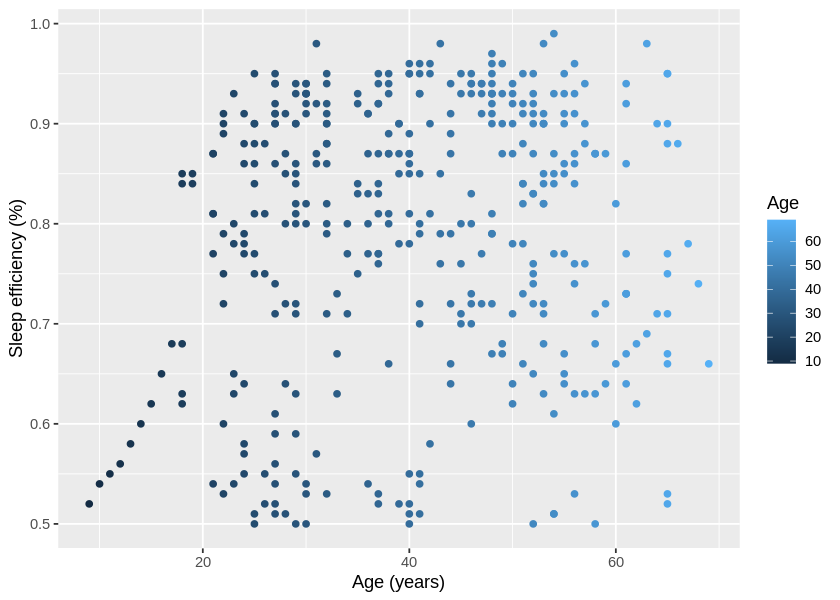

In [5]:
# Visualizing the relationship between age and sleep efficiency
options(repr.plot.height = 5, repr.plot.width = 7) 
age_plot <- sleep %>% 
    ggplot(aes(x = Age, y = Sleep.efficiency)) +
    geom_point(aes(colour = Age)) +
    xlab("Age (years)") + 
    ylab("Sleep efficiency (%)")
age_plot


The scatter of data points for various ages and sleep efficiency appears random, therefore we do not observe any linear relationship between the two variables. As a result, we will exclude age from our model.

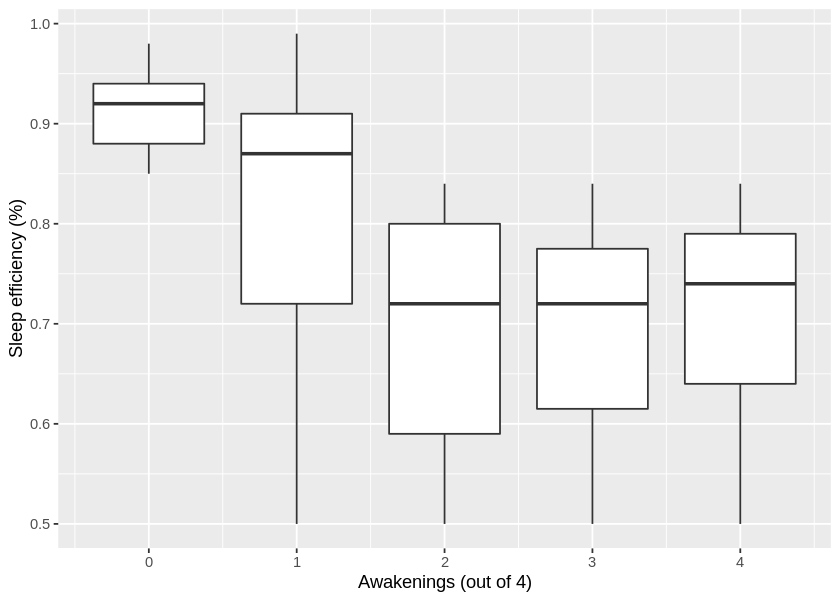

In [6]:
# Visualizing the relationship between awakenings and sleep efficiency
awakenings_plot <- sleep %>% 
    ggplot(aes(x = Awakenings, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Awakenings)) +
    xlab("Awakenings (out of 4)") + 
    ylab("Sleep efficiency (%)")

awakenings_plot

From the plot above, we observe an overall decrease in the median of sleep efficiency as the number of awakenings in a night increases. Additionally, the spread of data points is similar between awakening levels 1-4. Therefore we will use awakenings as an explanatory variable in our model.

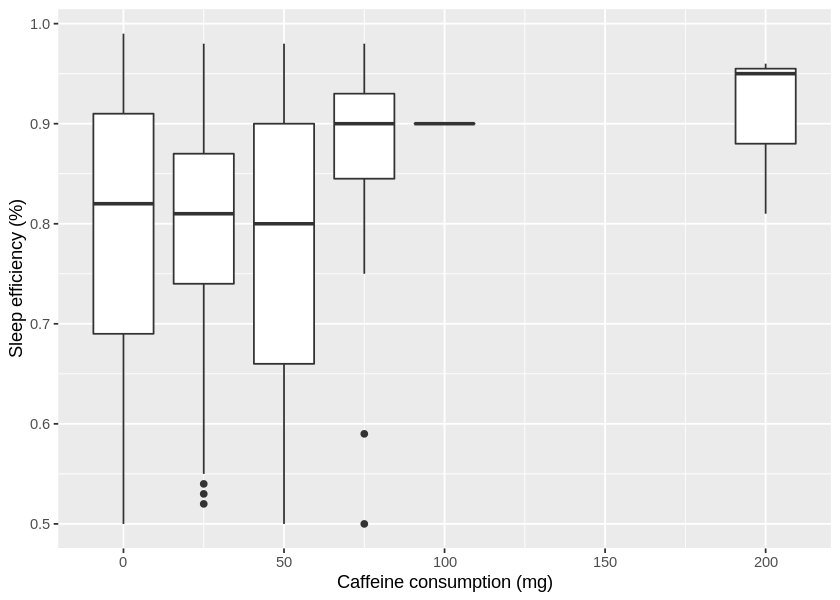

In [7]:
# Visualizing the relationship between caffeine consumption and sleep efficiency
caffeine_plot <- sleep %>% 
    ggplot(aes(x = Caffeine.consumption, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Caffeine.consumption)) + 
    xlab("Caffeine consumption (mg)") + 
    ylab("Sleep efficiency (%)")
caffeine_plot


As caffeine consumption increases, the mean for sleep efficiency is not linearly increasing nor decreasing. The sleep efficiency mean is close to 0.8, however its fluctuations are inconsistent and there are absent observations between 100 mg to 200 mg. The spread of the boxplots are also inconsistent, as 75 mg of caffeine has less spread than 50 mg. Because of the inconsistent data, we chose not to use caffeine consumption as an explanatory variable.

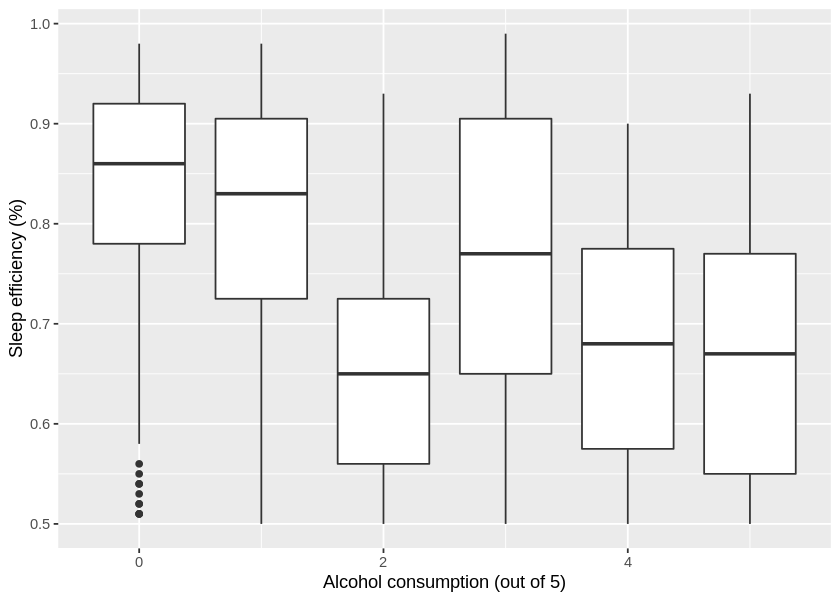

In [8]:
options(repr.plot.height = 5, repr.plot.width = 7) 

# Visualizing the relationship between alcohol consumption and sleep efficiency
alcohol_plot <- sleep %>% 
    ggplot(aes(x = Alcohol.consumption, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Alcohol.consumption)) +
    xlab("Alcohol consumption (out of 5)") + 
    ylab("Sleep efficiency (%)")
alcohol_plot


Once again, we observe an overall decrease in sleep efficiency as alcohol consumption increases, therefore we will use alcohol consumption as an explanatory variable in our model. For level 2 consumption there is a decrease in sleep efficiency, however we will assume this is due to experimental errors because the rest of the levels follows a negative trend.

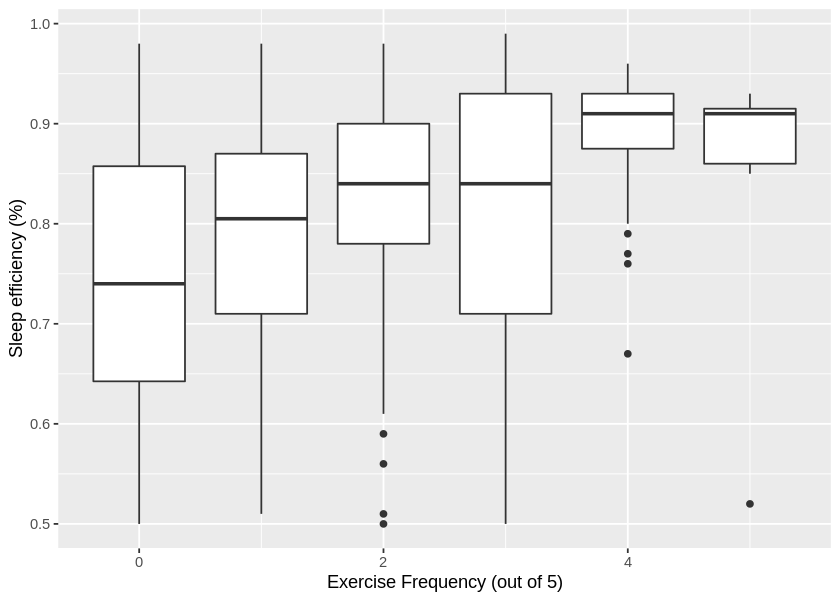

In [9]:
options(repr.plot.height = 5, repr.plot.width = 7) 
require(gridExtra)

# Visualizing the relationship between exercise frequency and sleep efficiency
exercise_plot <- sleep %>% 
    ggplot(aes(x = Exercise.frequency, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Exercise.frequency)) +
    xlab("Exercise Frequency (out of 5)") + 
    ylab("Sleep efficiency (%)")
exercise_plot



We can observe an increase in sleep efficiency as exercise frequency increases. Therefore we will use exercise frequency as an explanatory variable in our mdoel. From the visualizations above, we will focus on testing the relationship between alcohol consumption, exercise frequency, and awakenings against sleep efficiency. Since we do not see an evident relationship between caffeine consumption and age against sleep efficiency, we chose to exclude these two variables.

### Choosing dummy variables ###

Since dummy variables are used to encode levels of categorical variables, we should assign Gender as a dummy variable to differentiate between "Male" and "Female". By adding dummy variables, our model should look like the following:

In [10]:
# Creating dummy variables
gender_m <- ifelse(sleep_training$Gender == "Male", 1, 0)
head(sleep)

# Creating our model with dummy variables
dummy_model <- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + gender_m , data = sleep_training)
summary(dummy_model)


ID Age Gender Bedtime             Wakeup.time         Sleep.duration
1 1  65  Female 2021-03-06 01:00:00 2021-03-06 07:00:00 6             
2 2  69  Male   2021-12-05 02:00:00 2021-12-05 09:00:00 7             
3 3  40  Female 2021-05-25 21:30:00 2021-05-25 05:30:00 8             
4 4  40  Female 2021-11-03 02:30:00 2021-11-03 08:30:00 6             
5 5  57  Male   2021-03-13 01:00:00 2021-03-13 09:00:00 8             
6 7  27  Female 2021-07-21 21:00:00 2021-07-21 03:00:00 6             
  Sleep.efficiency REM.sleep.percentage Deep.sleep.percentage
1 0.88             18                   70                   
2 0.66             19                   28                   
3 0.89             20                   70                   
4 0.51             23                   25                   
5 0.76             27                   55                   
6 0.54             28                   25                   
  Light.sleep.percentage Awakenings Caffeine.consumption Alcohol.consumption
1 12                     0           0                   0                  
2 53                     3           0                   3                  
3 10                     1           0                   0                  
4 52                     3          50                   5                  
5 18                     3           0                   3                  
6 47                     2          50                   0                  
  Smoking.status Exercise.frequency
1 Yes            3                 
2 Yes            3                 
3 No             3                 
4 Yes            1                 
5 No             3                 
6 Yes            1


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + gender_m, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33528 -0.04429  0.02410  0.07139  0.22724 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.8652465  0.0134448  64.356  < 2e-16 ***
Alcohol.consumption -0.0252272  0.0037754  -6.682 1.12e-10 ***
Awakenings          -0.0454922  0.0046524  -9.778  < 2e-16 ***
Exercise.frequency   0.0151346  0.0043227   3.501 0.000533 ***
gender_m             0.0001191  0.0122782   0.010 0.992265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1041 on 304 degrees of freedom
Multiple R-squared:  0.4182,	Adjusted R-squared:  0.4106 
F-statistic: 54.63 on 4 and 304 DF,  p-value: < 2.2e-16


##### Creating model1: The Simplest Model #####

After dropping the variables Age and Caffeine consumption, we start our analysis by building the simplest linear model, naming it model1 which contains the following three variables: Awakenings, Alcohol consumption and Exercise frequency. The summary for our model1 can be seen below where we observe an adjusted R-squared value of 0.4237. Since the adjusted R-squared changes the R-squared statistic by penalizing the addition of unnecessary variables, this means it has a higher model's explanatory power. 

In [11]:
# Creating our model without dummy variables
model1<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency, data = sleep_training)
summary(model1)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33523 -0.04423  0.02414  0.07142  0.22728 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.865278   0.013033  66.392  < 2e-16 ***
Alcohol.consumption -0.025228   0.003769  -6.694 1.04e-10 ***
Awakenings          -0.045484   0.004574  -9.944  < 2e-16 ***
Exercise.frequency   0.015145   0.004194   3.611 0.000357 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1039 on 305 degrees of freedom
Multiple R-squared:  0.4182,	Adjusted R-squared:  0.4125 
F-statistic: 73.08 on 3 and 305 DF,  p-value: < 2.2e-16


• From the results we conclude that the dummy variable for gender is not a statistically significant
variable because its p-value is greater than our significance level (INSERT ALPHA HERE), and the
R-Square even decrease slightly after we add gender dummy. Therefore we can drop Gender as a
predictor for our model since it is not important to predicting sleep efficiency.\
• Thus, explanatory varibles with Alcohol consumption, Awakenings, Excercise frequency will be our
model1 for prediction.

### Exploring interactions between variables ###

In [12]:
#model with all interaction terms
model2_interaction <- lm(Sleep.efficiency ~Alcohol.consumption*Awakenings*Exercise.frequency, data = sleep_training)
summary(model2_interaction)

#model with only 2 interation terms
model2<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + Alcohol.consumption*Awakenings + Alcohol.consumption*Exercise.frequency , data = sleep_training)
summary(model2)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption * Awakenings * 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33277 -0.04074  0.02126  0.06723  0.22026 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        0.887516   0.017894  49.600
Alcohol.consumption                               -0.054009   0.011516  -4.690
Awakenings                                        -0.055258   0.008419  -6.564
Exercise.frequency                                 0.007074   0.007128   0.992
Alcohol.consumption:Awakenings                     0.010920   0.004310   2.533
Alcohol.consumption:Exercise.frequency             0.010833   0.004547   2.383
Awakenings:Exercise.frequency                      0.003098   0.003845   0.806
Alcohol.consumption:Awakenings:Exercise.frequency -0.004095   0.002050  -1.997
                                                


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Alcohol.consumption * Awakenings + Alcohol.consumption * 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33330 -0.04357  0.02485  0.07114  0.19867 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.878856   0.015215  57.762  < 2e-16
Alcohol.consumption                    -0.040218   0.009357  -4.298 2.32e-05
Awakenings                             -0.050269   0.005555  -9.050  < 2e-16
Exercise.frequency                      0.011572   0.005230   2.213   0.0277
Alcohol.consumption:Awakenings          0.004602   0.002915   1.579   0.1155
Alcohol.consumption:Exercise.frequency  0.003456   0.002772   1.247   0.2133
                                          
(Intercept)                            ***
Alcohol.consumption                    ***
Awakenin

From the results, we can see the interaction terms *Alcohol.consumption:Awakenings*, *Alcohol.consumption:Exercise.frequency* are significant at 0.05 significant level, so we will include those
terms in our model2.

##### Creating model2: Two Interaction Terms #####
Since a model with a higher adjusted R-squared has a higher model's explanatory power, we also built an interactive model to see if it could increase the R-squared value that we are getting. From the analysis, we can see that interactions between Alcohol consumption*Exercise frequency and Alcohol consumption*Awakenings are significant at the 0.05 significance level. Thus, we created our model2 with the terms Awakenings, Alcohol consumptions, Exercise frequency, Alcohol consumption*Exercise frequency and Alcohol consumption*Awakenings. From the model summary below, we have an adjusted R-squared of 0.4255 which is a slight increase, however we are still concerned about the complexity of “model2” compared to model1. 

#### Residual Plots and QQ-Plots ####
To better understand our models, we create residual and QQ-plots for both model1 and model2 to see if our model requires further transformations. Because the plots for both models are almost the same, we will only attach plots for model1 here (others can be seen in our coding attachment).

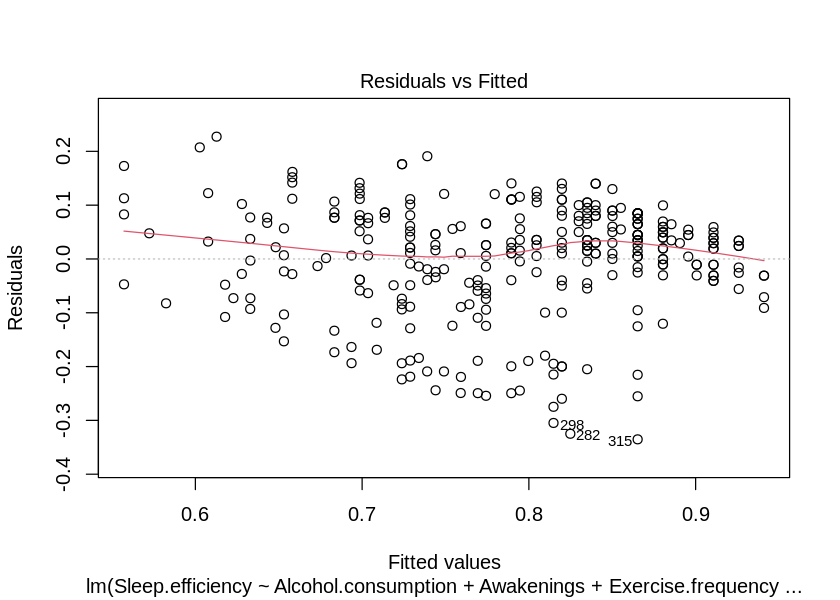

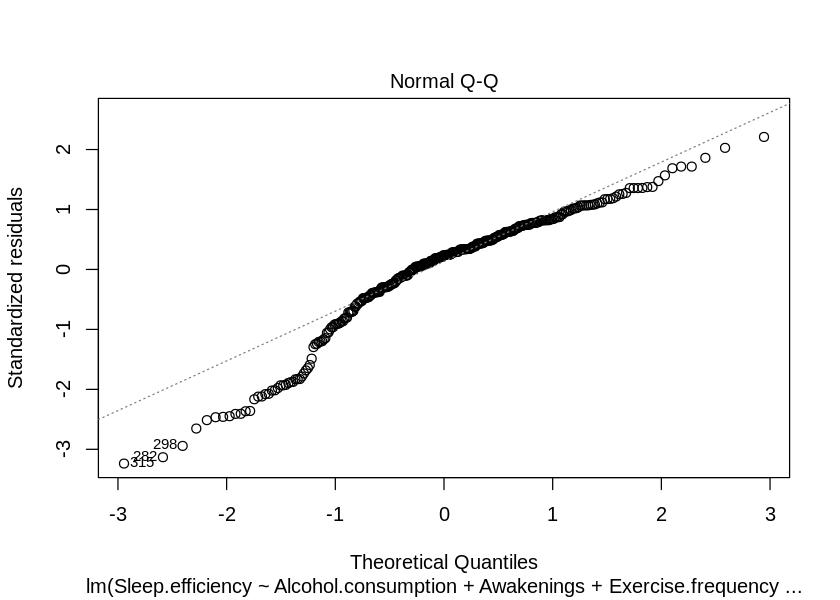

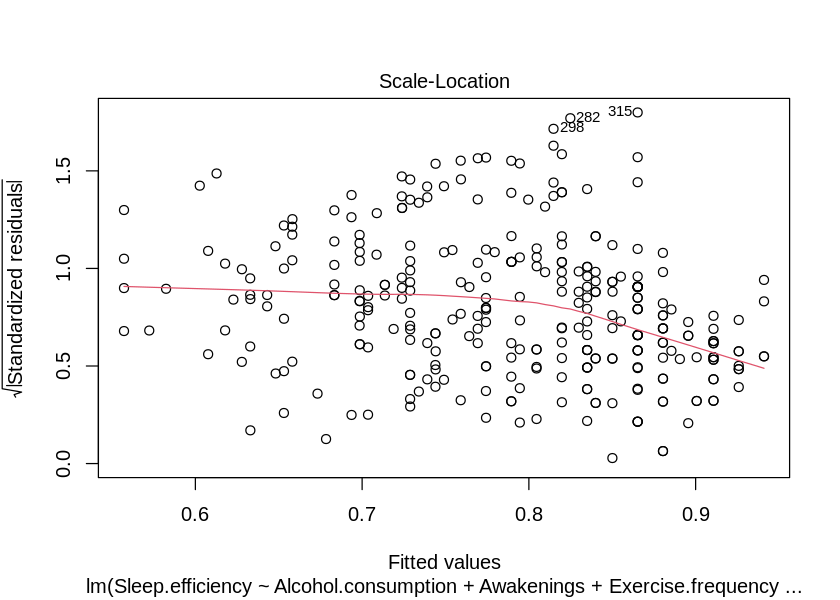

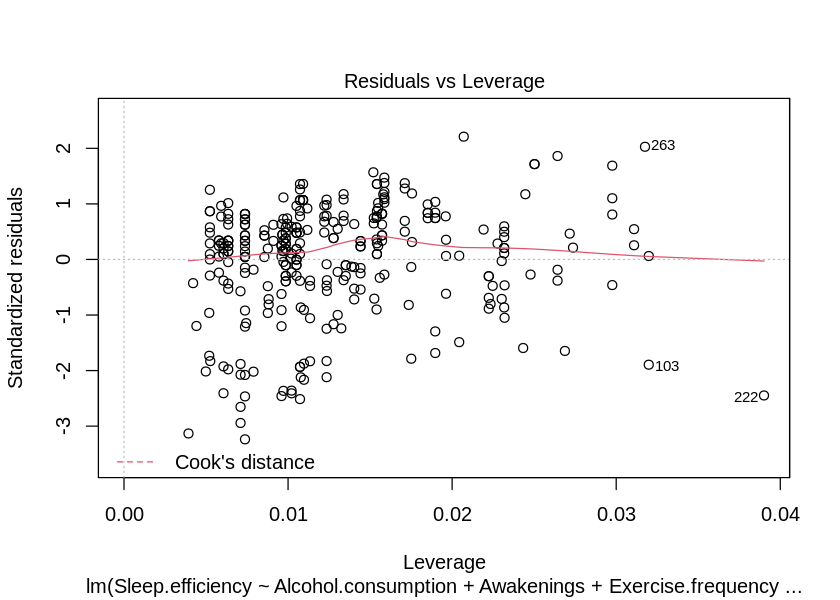

In [13]:
# Plotting model 1
plot(model1)

From Figure 5: Awakenings vs Residuals for model 1, we can see a pattern suggesting a stronger model has a transformation of adding Awakening^2 to our regression model.

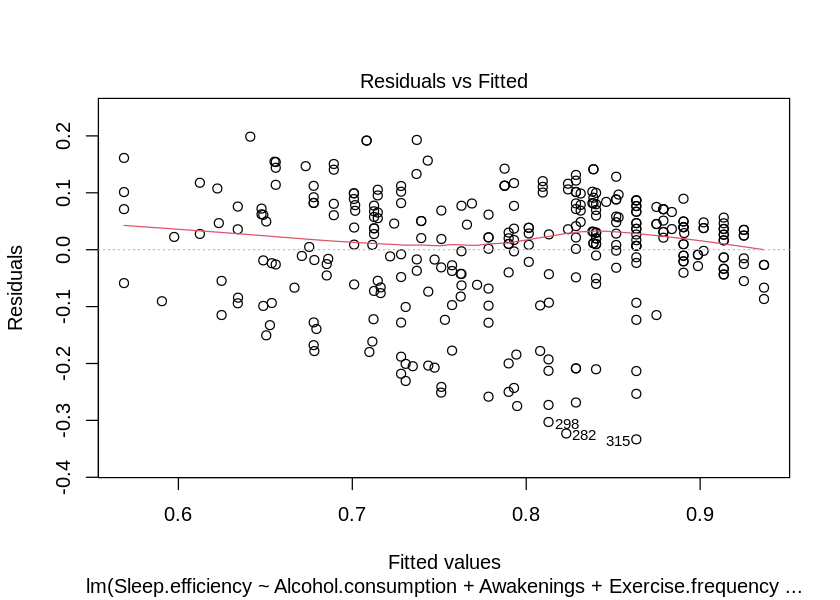

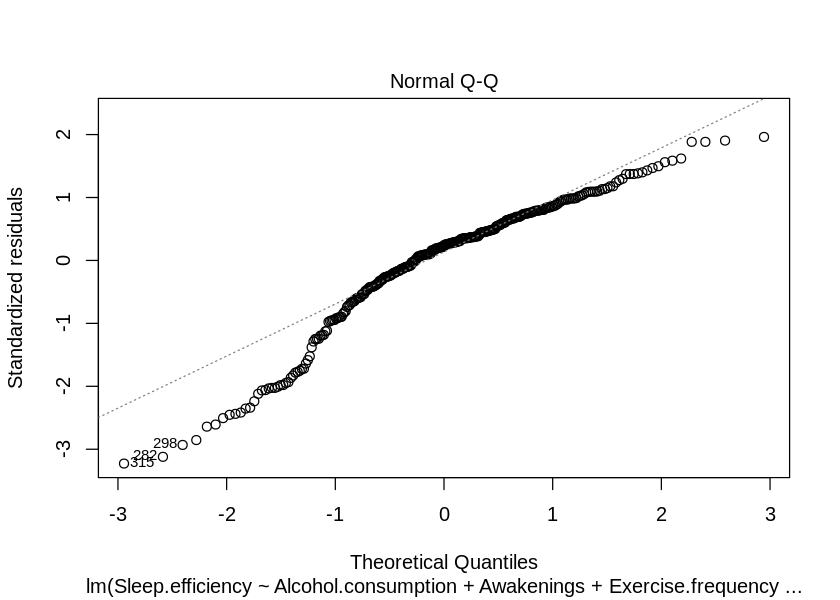

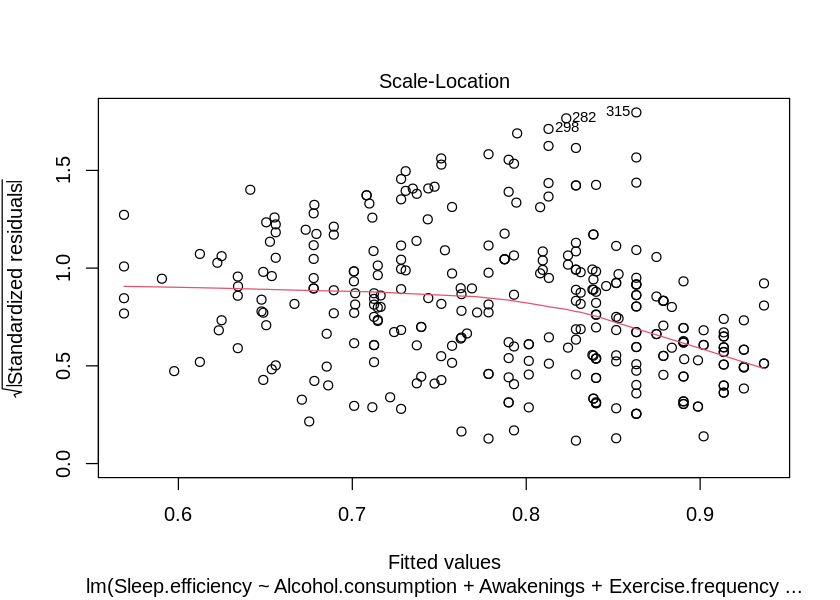

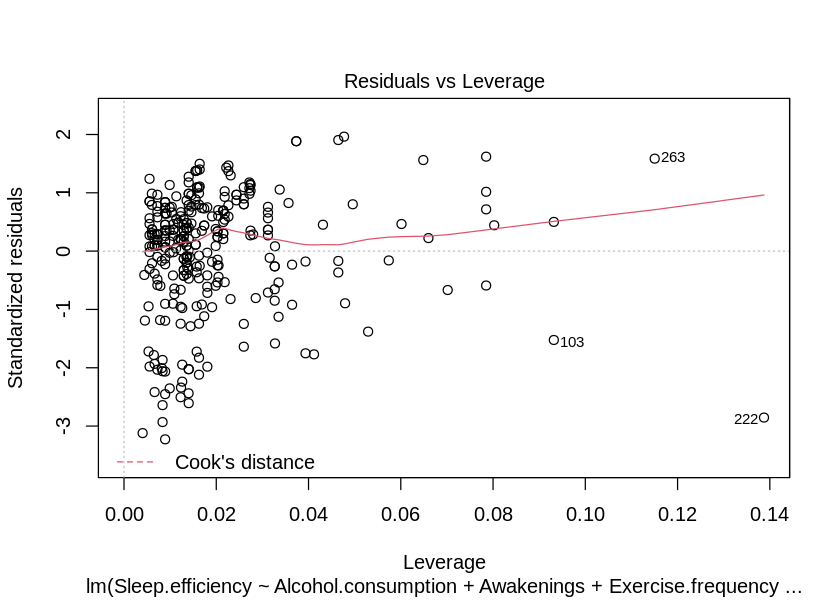

In [14]:
# Plotting model2
plot(model2)

#### Plotting Residuals ####

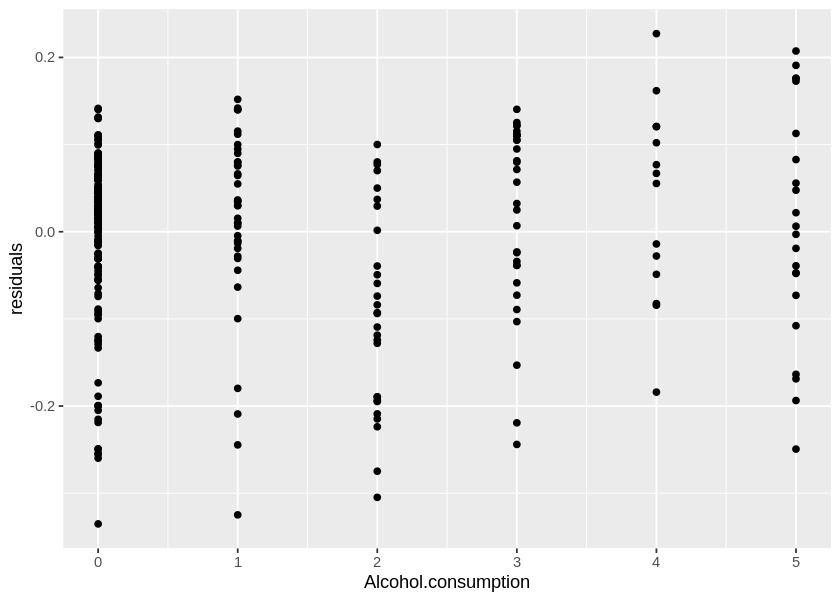

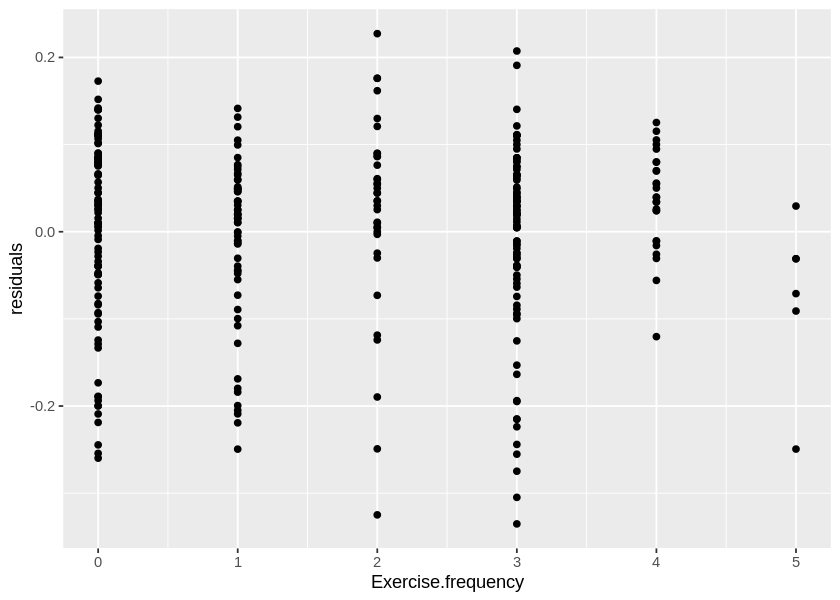

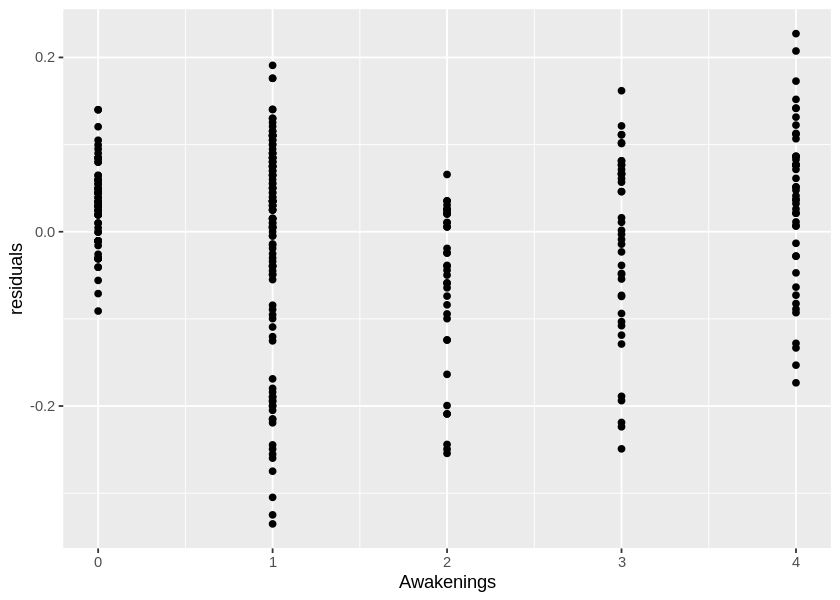

In [15]:
# Model1
# Alcohol Consumption vs Residuals
residuals <- residuals(model1)
data<-data.frame(Alcohol.consumption = sleep_training$Alcohol.consumption, residuals = residuals)
ggplot(data,aes(Alcohol.consumption,residuals)) + geom_point()

#Exercise Frequency vs Residuals
data1<-data.frame(Exercise.frequency = sleep_training$Exercise.frequency, residuals = residuals)
ggplot(data1,aes(Exercise.frequency,residuals)) + geom_point()

#Awakenings vs Residuals
data2<-data.frame(Awakenings = sleep_training$Awakenings, residuals = residuals)
ggplot(data2,aes(Awakenings,residuals)) + geom_point()

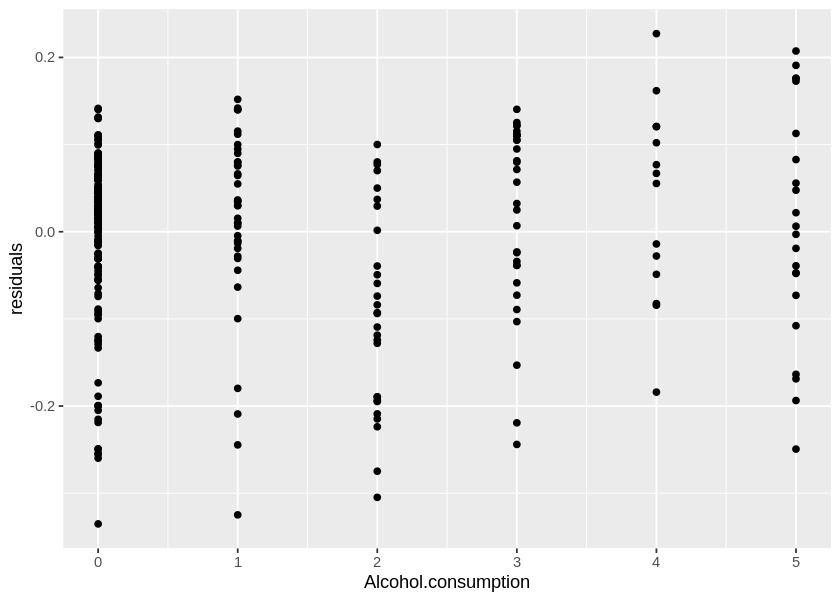

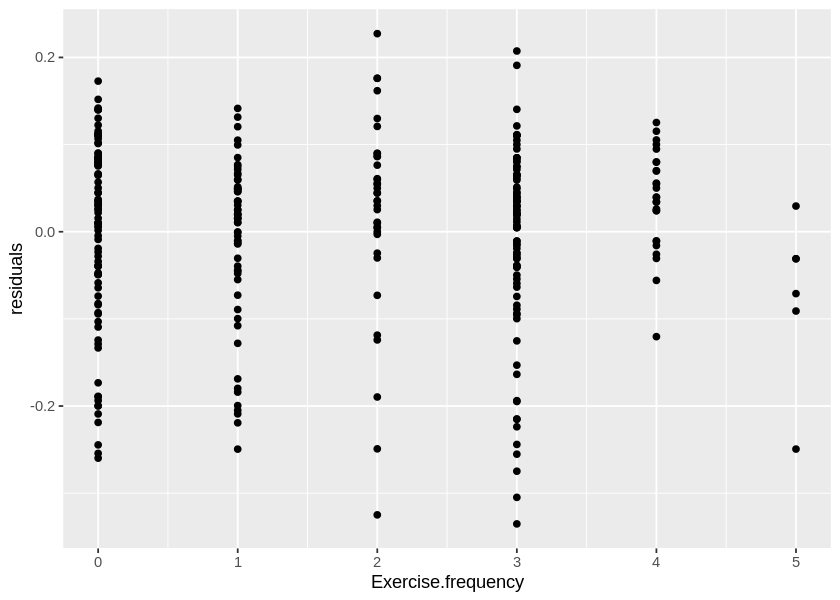

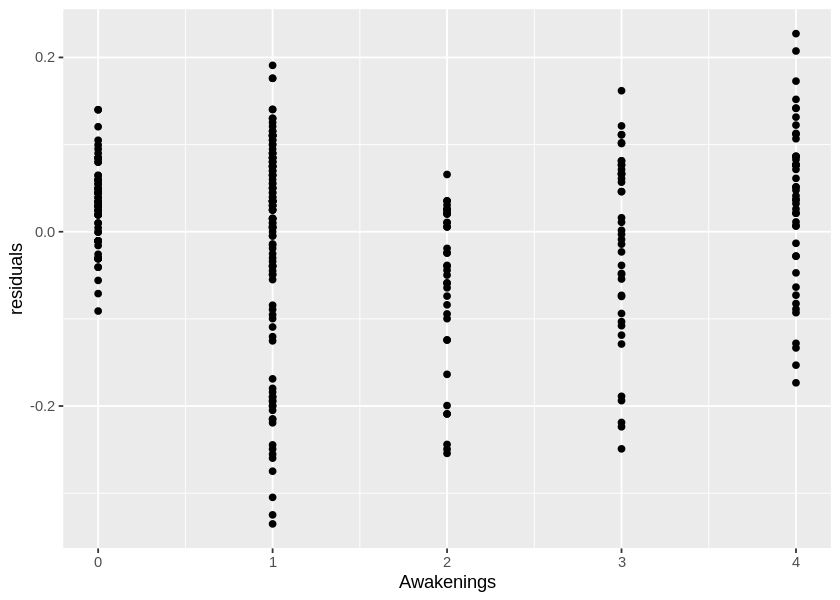

In [16]:
# Model2
#Alcohol Consumption vs Residuals
residuals2 <- residuals(model2)
data.<-data.frame(Alcohol.consumption = sleep_training$Alcohol.consumption, residuals2 = residuals2)
ggplot(data.,aes(Alcohol.consumption,residuals)) + geom_point()

#Exercise Frequency vs Residuals
data.1<-data.frame(Exercise.frequency = sleep_training$Exercise.frequency, residuals2 = residuals2)
ggplot(data.1,aes(Exercise.frequency,residuals)) + geom_point()

#Awakenings vs Residuals
data.2<-data.frame(Awakenings = sleep_training$Awakenings, residuals2 = residuals2)
ggplot(data.2,aes(Awakenings,residuals)) + geom_point()

From above plots, we think we could try square the explanatory variables to see if we could get a better
performance.

#### Creating model1_Trans and model2_Trans ####
To test our hypothesis, we will add Awakening^2, Alcohol consumptions^2 and Exercise frequency^2 to our past models, model1 and model2, to see if Awakening^2 or other terms are significant. From the summary, we can see only Awakenings^2 is significant at the 0.001 significant level for both model1 and model2. 

In [17]:
# Transformations testing for Model1
Alcohol_squared <- sleep_training$Alcohol.consumption^2

Awakenings_squared <- sleep_training$Awakenings^2

Exercise_squared <- sleep_training$Exercise.frequency^2

model1t<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + Alcohol_squared + Awakenings_squared + Exercise_squared , data = sleep_training)
summary(model1t)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Alcohol_squared + Awakenings_squared + 
    Exercise_squared, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32058 -0.04956  0.00978  0.06411  0.18393 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.903325   0.015174  59.530  < 2e-16 ***
Alcohol.consumption -0.042531   0.011841  -3.592 0.000383 ***
Awakenings          -0.116554   0.015595  -7.474 8.47e-13 ***
Exercise.frequency   0.022992   0.012666   1.815 0.070479 .  
Alcohol_squared      0.004502   0.002658   1.694 0.091358 .  
Awakenings_squared   0.017573   0.003690   4.762 2.98e-06 ***
Exercise_squared    -0.002526   0.003229  -0.783 0.434514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1001 on 302 degrees of freedom
Multiple R-squared:  0.465,	Adjusted R-squared:  0.4544 
F-statistic: 43.7

Thus, we create a model called model1_Trans which is model1 with the addition of Awakening^2, and model2_Trans which is model2 with the addition of Awakening^2. Below are summaries for model1_Trans and model2_Trans.

In [18]:
# Thus our transformation model for Model1(with no interation terms) wil be:
model1_Trans<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + Awakenings_squared, data = sleep_training)
summary(model1_Trans)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Awakenings_squared, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31437 -0.04578  0.01298  0.06903  0.20406 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.902012   0.014797  60.959  < 2e-16 ***
Alcohol.consumption -0.023685   0.003658  -6.475 3.80e-10 ***
Awakenings          -0.115294   0.015398  -7.488 7.65e-13 ***
Exercise.frequency   0.013442   0.004070   3.303  0.00107 ** 
Awakenings_squared   0.017322   0.003660   4.733 3.39e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1005 on 304 degrees of freedom
Multiple R-squared:  0.4581,	Adjusted R-squared:  0.451 
F-statistic: 64.26 on 4 and 304 DF,  p-value: < 2.2e-16


#### Trying transformations for model2 ####

In [19]:
#Transformations testing for Model2
Alcohol_squared <- sleep_training$Alcohol.consumption^2

Awakenings_squared <- sleep_training$Awakenings^2

Exercise_squared <- sleep_training$Exercise.frequency^2

model2t<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency +Alcohol_squared + Awakenings_squared + Exercise_squared+ Alcohol.consumption*Awakenings +
Alcohol.consumption*Exercise.frequency , data = sleep_training)
summary(model2t)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Alcohol_squared + Awakenings_squared + 
    Exercise_squared + Alcohol.consumption * Awakenings + Alcohol.consumption * 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31399 -0.04858  0.01373  0.06660  0.17183 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.915170   0.016867  54.258  < 2e-16
Alcohol.consumption                    -0.053818   0.014177  -3.796 0.000178
Awakenings                             -0.119561   0.015675  -7.628 3.19e-13
Exercise.frequency                      0.017255   0.013089   1.318 0.188419
Alcohol_squared                         0.004753   0.002687   1.769 0.077954
Awakenings_squared                      0.018100   0.003794   4.771 2.87e-06
Exercise_squared                       -0.002387   0.003225  -0.740 0.4597

In [20]:
#Model2 with square of all terms has a lower R square compare to only add Awakeningsˆ2, so we try:
model2_Trans<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency+

Awakenings_squared + Alcohol.consumption*Awakenings +
Alcohol.consumption*Exercise.frequency , data = sleep_training)

summary(model2_Trans)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Awakenings_squared + Alcohol.consumption * 
    Awakenings + Alcohol.consumption * Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30876 -0.04603  0.01335  0.07125  0.19159 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.913832   0.016510  55.351  < 2e-16
Alcohol.consumption                    -0.035117   0.009116  -3.852 0.000143
Awakenings                             -0.118215   0.015496  -7.629 3.12e-13
Exercise.frequency                      0.008511   0.005101   1.668 0.096283
Awakenings_squared                      0.017606   0.003766   4.675 4.44e-06
Alcohol.consumption:Awakenings          0.001972   0.002875   0.686 0.493229
Alcohol.consumption:Exercise.frequency  0.004389   0.002688   1.633 0.103574
                                       

From the four models below, we can see the adjusted R-squared for *model1_Trans* is 0.4682 and for *model2_Trans* it is 0.4697. There is a small difference between the two values, however we observe a 4% increase between *model1* and *model2*. 

model1_Trans: 0.4682\
model1: 0.4237\
model2_Trans: 0.4697\
model2: 0.4255


#### Computing AIC for Further Comparison ####
In order to get more evidence for us to analyze which model is the best, we also evaluate our four models by the AIC (Akaike Information Criterion). A lower AIC value indicates a better trade-off between fit and complexity. From the AIC of the four models shown below, we observed “model1_Trans” has the lowest AIC value.


In [21]:
AIC(model1_Trans)
AIC(model1)
AIC(model2_Trans)
AIC(model2)

regsubsets(Sleep.efficiency ~Alcohol.consumption*Awakenings*Exercise.frequency +Alcohol_squared + Awakenings_squared + Exercise_squared , data = sleep_training)

[1] -536.3256

[1] -516.355

[1] -535.0813

[1] -515.4934

Subset selection object
Call: regsubsets.formula(Sleep.efficiency ~ Alcohol.consumption * Awakenings * 
    Exercise.frequency + Alcohol_squared + Awakenings_squared + 
    Exercise_squared, data = sleep_training)
10 Variables  (and intercept)
                                                  Forced in Forced out
Alcohol.consumption                                   FALSE      FALSE
Awakenings                                            FALSE      FALSE
Exercise.frequency                                    FALSE      FALSE
Alcohol_squared                                       FALSE      FALSE
Awakenings_squared                                    FALSE      FALSE
Exercise_squared                                      FALSE      FALSE
Alcohol.consumption:Awakenings                        FALSE      FALSE
Alcohol.consumption:Exercise.frequency                FALSE      FALSE
Awakenings:Exercise.frequency                         FALSE      FALSE
Alcohol.consumption:Awakenings:Exercise.freque

#### Compute RMSE for further comparison ####
Moreover, we use testing data (20% of the dataset) to compute the RMSE, which measures the average difference between the predicted and actual values to provide an estimation of how accurate the model is, we can compare which of the four models fit the data better. From the RMSE of the four models shown below, we observed “model1_Trans” has the lowest RMSE value.
(RMSE value will be different each time we run the codes, because the data allocation for testing data and training data are different each time)


In [22]:
#rmse for model1
rmse = function(u,v)sqrt(mean(u-v)^2)
rmse(sleep_testing$Sleep.efficiency, predict(model1,newdata=sleep_testing))

Alcohol_squared <- sleep_testing$Alcohol.consumption^2

Awakenings_squared <- sleep_testing$Awakenings^2

Exercise_squared <- sleep_testing$Exercise.frequency^2

rmse(sleep_testing$Sleep.efficiency, predict(model1_Trans,newdata=sleep_testing))
rmse(sleep_testing$Sleep.efficiency, predict(model2,newdata=sleep_testing))
rmse(sleep_testing$Sleep.efficiency, predict(model2_Trans,newdata=sleep_testing))

[1] 0.0004532082

[1] 0.001201856

[1] 0.0005242504

[1] 0.001017429

#### Pick the best model ####
From the analysis, we conclude that *model1_Trans* (which contains variables *Awakenings, Alcohol consumptions, Exercise frequency* and *Awakenings^2*) will be our final model. Firstly, it has a relatively high adjusted R-square, although *model2_Trans* is slightly higher, but it is much more complicated. Secondly, *model1_Trans* has the lowest AIC value, which value indicates a better trade-off between fit and complexity. Lastly, *model1_Trans* also has the lowest RMSE value, which means it has the lowest average difference between the predicted and actual values, indicates it is more accurate.
